<a href="https://colab.research.google.com/github/wolego2uni/projects/blob/main/Logbook(Tutorial_9a).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PROBLEM STATEMENT**

Chrisco is interested in understanding what the data shows, the company wants to explore the clustering of its pages

# **Import libraries** 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
pd.plotting.register_matplotlib_converters()

# **Importing Chris co's data** 

In [ ]:
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/DailyHits.csv',
         index_col=0)
data.index = pd.to_datetime(data.index)

In [ ]:
page_revenue = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageRevenue.csv', index_col=0)
page_size = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageSize.csv', index_col=0)
page_speed = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageSpeed.csv', index_col=0)
page_viewing_time = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageViewingTime.csv', index_col=0)
page_exit_rate= pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/PageExitRate.csv', index_col=0)

In [ ]:
summary_data = pd.DataFrame(index=data.columns)
summary_data['Size'] = page_size.values
summary_data['Revenue'] = page_revenue.values
summary_data['Hits'] = data.sum().values
summary_data['Viewing'] =page_viewing_time.values
summary_data['Download'] = page_speed.values
summary_data['Exit'] = page_exit_rate.values
print(summary_data.head())

           Size      Revenue    Hits     Viewing   Download       Exit
001  106.153936  1972.142118  379682  175.438381   7.601041  24.759071
002   79.352399   101.836934   17401   75.474441   7.079163  18.458663
003   48.208457   196.146652   27249   10.027850   4.714836  47.518158
004  105.709602   102.653630   11668  117.802372  13.995231  32.354706
005   43.593542     3.060067     533   12.522355   5.622858  45.828504


# **Elbow and Silhouette Methods** 

To estimate the optimal number of clusters for the summary data

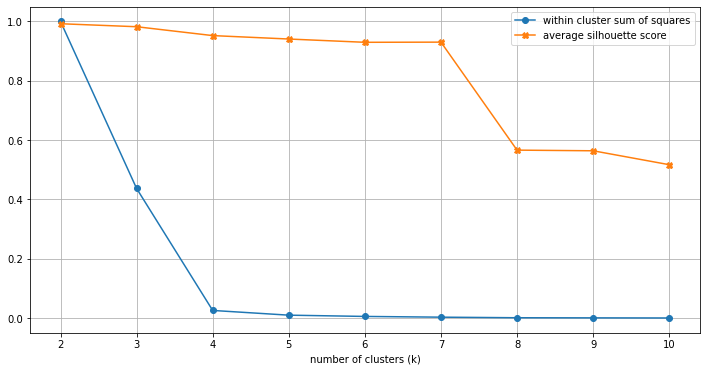

In [ ]:
selected = summary_data.columns
min_k = 2
max_k = 10
k_values = range(min_k, max_k + 1)
WCSS = []
silhouette = []
for k in k_values:
    k_means = KMeans(n_clusters=k, init='k-means++', random_state=1)
    labels = k_means.fit_predict(summary_data[selected])
    WCSS.append(k_means.inertia_)
    silhouette.append(silhouette_score(summary_data[selected], labels))
WCSS = WCSS / max(WCSS)

plt.figure(figsize=(12, 6))
plt.plot(k_values, WCSS, marker='o', label='within cluster sum of squares')
plt.plot(k_values, silhouette, marker='X', label='average silhouette score')
plt.xlabel('number of clusters (k)')
plt.legend()
plt.grid()
plt.show()


From the chat there is a clear elbow at K=4, while the highest value of the silhouette score occurs at K=2, hence the values are different. 

# **Clustering the summary data (Page Revenue vs Total Hits)**


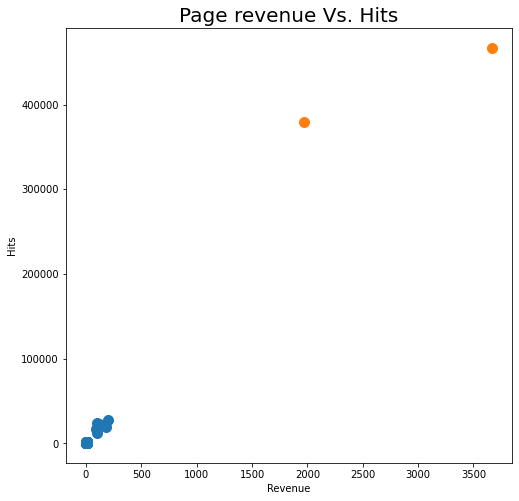

In [ ]:
k = 2
selected = summary_data.columns
k_means = KMeans(n_clusters=k, init='k-means++', random_state=1)
summary_data['label'] = k_means.fit_predict(summary_data[selected])

clusters = []
for c in range(k):
    clusters.append(summary_data[summary_data['label'] == c])

plt.figure(figsize=(8, 8))
for c in range(k):
    plt.scatter(clusters[c]['Revenue'], clusters[c]['Hits'], s=100)
plt.title('Page revenue Vs. Hits', fontsize= 20)    
plt.xlabel('Revenue')
plt.ylabel('Hits')
plt.show()


The data has been split into two groups, one for the pages with high volume hits and the second group of pages with medium and low volume hits. There is a distinctively clear seperation between both groups.

# **Clustering the summary data (Viewing time vs Page size)**

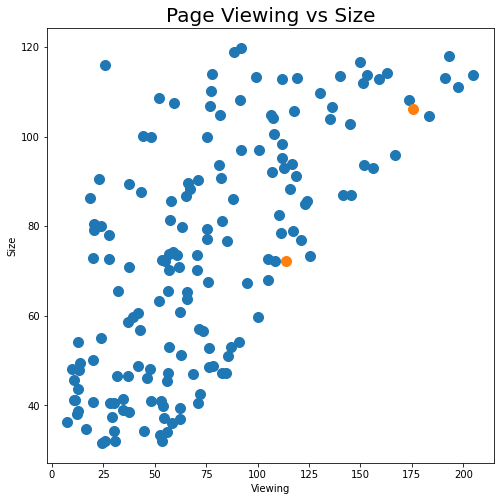

In [ ]:
k = 2
selected = summary_data.columns
k_means = KMeans(n_clusters=k, init='k-means++', random_state=1)
summary_data['label'] = k_means.fit_predict(summary_data[selected])

clusters = []
for c in range(k):
    clusters.append(summary_data[summary_data['label'] == c])

plt.figure(figsize=(8, 8))
for c in range(k):
    plt.scatter(clusters[c]['Viewing'], clusters[c]['Size'], s=100)
plt.title('Page Viewing vs Size', fontsize= 20)    
plt.xlabel('Viewing')
plt.ylabel('Size')
plt.show()

With respect to the two groups of clusters in the plot above, it is difficult to differentiate the two groups which consist of high volume pages (yellow group) and medium & low volume pages(blue group). Hence this plot does little in showing clustering amongst the various pages. 

# **Clustering the summary data (Page Revenue vs Total Hits, using K =4)**

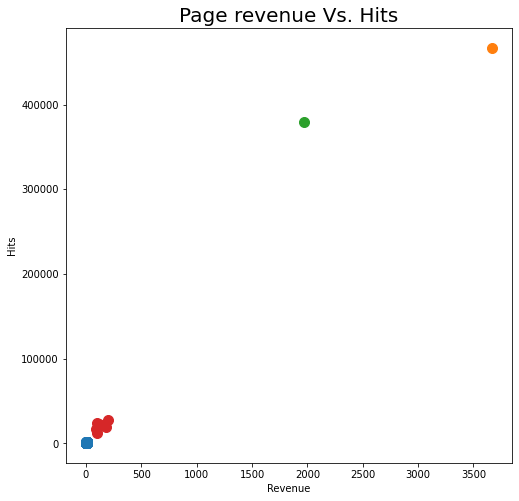

In [ ]:
k = 4
selected = summary_data.columns
k_means = KMeans(n_clusters=k, init='k-means++', random_state=1)
summary_data['label'] = k_means.fit_predict(summary_data[selected])

clusters = []
for c in range(k):
    clusters.append(summary_data[summary_data['label'] == c])

plt.figure(figsize=(8, 8))
for c in range(k):
    plt.scatter(clusters[c]['Revenue'], clusters[c]['Hits'], s=100)
plt.title('Page revenue Vs. Hits', fontsize= 20)    
plt.xlabel('Revenue')
plt.ylabel('Hits')
plt.show()


There are 4 groups of clusters, the data is segemented by the number of hits with blue points as the low volume pages, red for the medium volume pages, green for the second highest page and yellow for the page with the highest number of hits. 